In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

importing the dataset

In [31]:
house_price_dataset=pd.read_csv('/content/Boston.csv')


In [32]:
print(house_price_dataset)

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  medv 

In [10]:
# # #load data to data frame
# house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [11]:
# house_price_dataframe['price']=house_price_dataset.target

In [34]:
house_price_dataset.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
house_price_dataset.shape

(506, 15)

In [37]:
#check for missing values
house_price_dataset.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [38]:
#stats of the dataset
house_price_dataset.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


understanding the correlation between various features in the dataset

In [42]:
correlation=house_price_dataset.corr()

<Axes: >

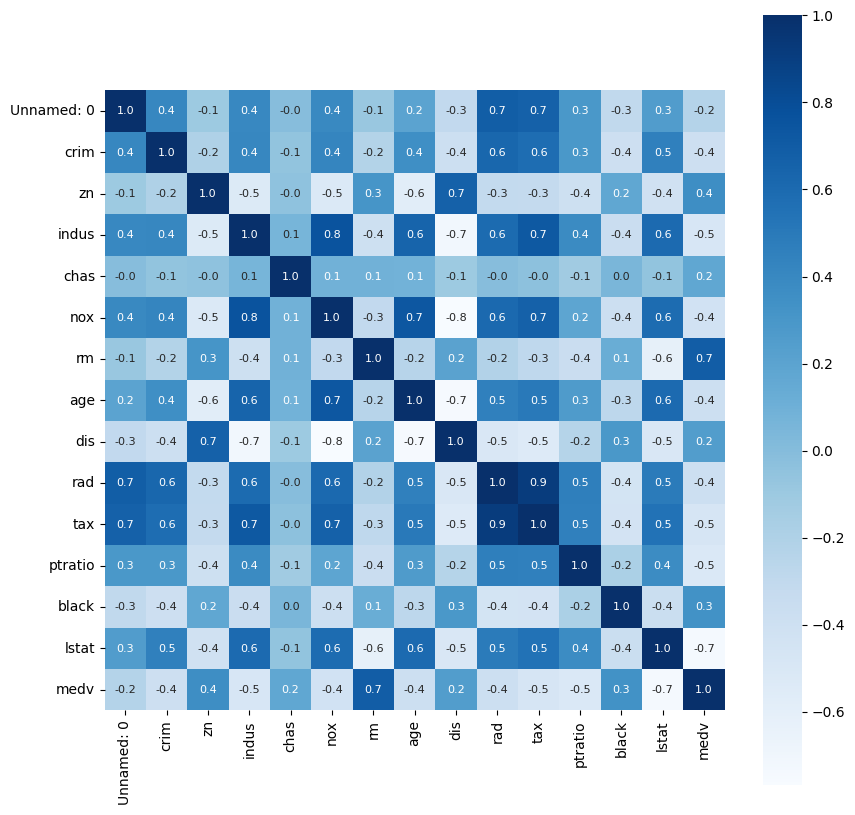

In [43]:
from seaborn.matrix import heatmap
#constructing heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [48]:
x=house_price_dataset.drop(columns='medv',axis=1)
y=house_price_dataset['medv']
print(x)
print(y)

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  
0   

split the data to training and test

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [52]:
print(x.shape,x_train.shape,x_test.shape)

(506, 14) (404, 14) (102, 14)


model training

In [53]:
#loading the model
model=XGBRegressor()

In [54]:
#training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
#evaluation of the model
training_data_prediction=model.predict(x_train)


In [56]:
print(training_data_prediction)

[23.117859  20.981482  20.101786  34.686577  13.904756  13.501808
 21.994654  15.187422  10.888625  22.69959   13.808849   5.5958323
 29.804226  49.993874  34.89774   20.607157  23.384403  19.177439
 32.672836  19.616465  26.98869    8.398133  45.993176  21.712616
 27.092016  19.40664   19.308039  24.79513   22.613031  31.721067
 18.54537    8.696038  17.407867  23.69771   13.301063  10.493207
 12.69378   25.004425  19.70235   14.898138  24.197193  24.994766
 14.896188  17.001759  15.604529  12.693677  24.50036   14.99998
 50.003513  17.508444  21.178383  32.01131   15.605909  22.89984
 19.318901  18.704332  23.296082  37.223534  30.091934  33.101162
 21.003372  49.99026   13.401213   5.0013776 16.49144    8.39809
 28.66047   19.507273  20.602201  45.406334  39.8162    33.406643
 19.8294    33.40621   25.275373  50.00002   12.523859  17.456083
 18.596672  22.593172  50.010036  23.771536  23.3122    23.09877
 41.6956    16.10857   31.60627   36.072662   6.999091  20.389017
 19.989578  1

In [58]:
#R squared error
score1=metrics.r2_score(y_train,training_data_prediction) #will find the variance between the data of Y_train and model prediction

In [59]:
print(score1)

0.9999963633437191


In [60]:
#mean absolute error
score2=metrics.mean_absolute_error(y_train,training_data_prediction)

In [61]:
print(score2)

0.012383987407873215


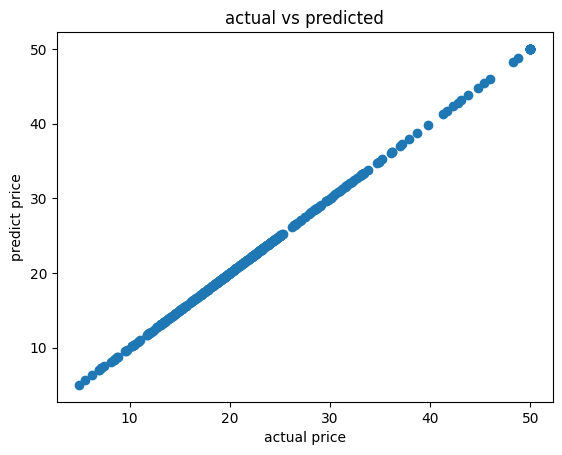

In [67]:
#visualizing the prices
plt.scatter(y_train,training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predict price')
plt.title('actual vs predicted')
plt.show()

In [63]:
#accuracy on test data
test_data_prediction=model.predict(x_test)
print(test_data_prediction)

[20.697313  21.62694   31.422932  30.350718   8.950485  14.729061
 23.431208  28.365587  27.738575  22.178358  27.958454  24.938755
 20.915903  22.537167  11.990866  23.83782   17.709148  10.733413
  7.7614403 15.740212  22.13135   20.507658  35.2346    18.71583
 14.5745125 19.994017  46.531044  30.891365  33.582535  20.326466
 15.806865  20.798124  33.556515  24.691275  12.320423  19.311497
 10.995539  21.023155  21.757982  21.60324   27.885092  12.991379
 29.898678   7.7659245 19.539078  14.298731  37.592663  15.44498
 32.19187   11.306019  30.874918  29.477715   6.8732095 34.765003
 22.722576  19.211893  18.832373  19.32089   15.4839325 22.214796
 18.806225  20.589258  18.581656  29.481966  34.28248   25.24759
 48.112835  26.179174  10.457504  23.499063  14.050171   8.140812
 18.868418  16.678371  24.936714  25.46422   21.375772  21.3177
 20.492533  22.817738  37.18433   17.564383  20.161585  29.869837
 48.981544  36.253407  18.214455  24.38383   28.767513  20.92871
 20.079885  20.2

In [64]:
score1=metrics.r2_score(y_test,test_data_prediction)

In [65]:
score2=metrics.mean_absolute_error(y_test,test_data_prediction)

In [66]:
print(score1)
print(score2)

0.8822970686643014
2.186447170668957
